In [31]:
import matplotlib.pyplot as plt

In [35]:
file_label_list = [

    # finetuned
    ("./finetune_gsm8k/benchmark_finetune_gsm8k.json", "Finetuned"),
    ("./finetune_gsm8k/benchmark_finetune_gsm8k_layer_skip.json", "Finetuned with Dynamic Layer Skipping"),
    ("./finetune_gsm8k/benchmark_finetune_gsm8k_dynamicearlyexit.json", "Finetuned with Dynamic Early Exiting"),
    ("./finetune_gsm8k/benchmark_finetune_gsm8k_combo.json", "Finetuned with Dynamic Early Exiting and LayerSkipping")
]

In [36]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
def all_json_objects(path: Path):
    """Yield successive JSON objects from a file that may contain several
    objects per physical line (concatenated without newlines)."""
    txt = path.read_text(encoding="utf-8").lstrip()
    decoder = json.JSONDecoder()
    idx = 0
    while idx < len(txt):
        obj, idx = decoder.raw_decode(txt, idx)
        yield obj
        # skip whitespace/newlines that may follow
        while idx < len(txt) and txt[idx].isspace():
            idx += 1

acceptance, tps, labels = [], [], []

for path, label in file_label_list:
    for obj in all_json_objects(Path(path)):
        if "tokens_per_second" in obj and "acceptance_rate" in obj:
            acceptance.append(obj["acceptance_rate"]["mean"])
            tps.append(obj["tokens_per_second"]["mean"])
            labels.append(label)
            break          # found our metrics block; next file…


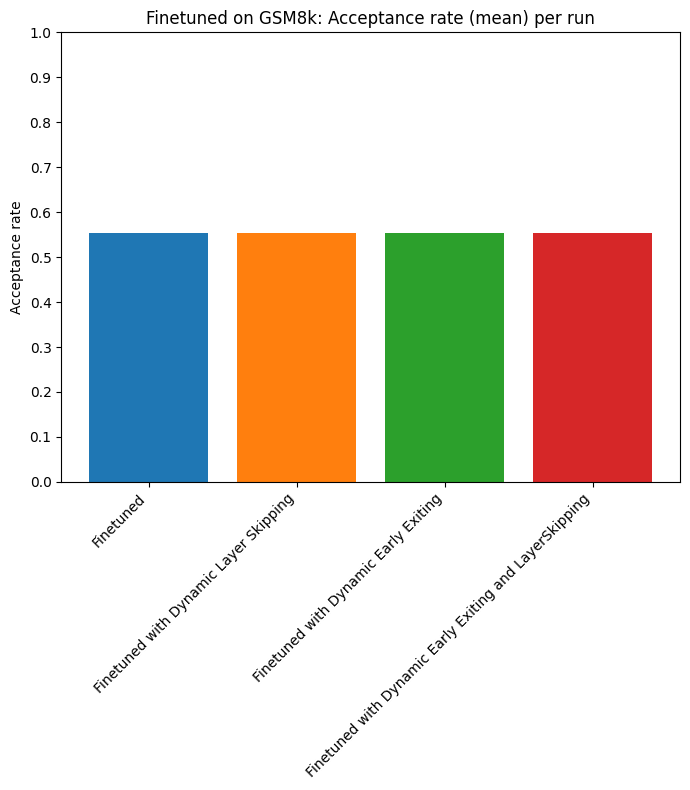

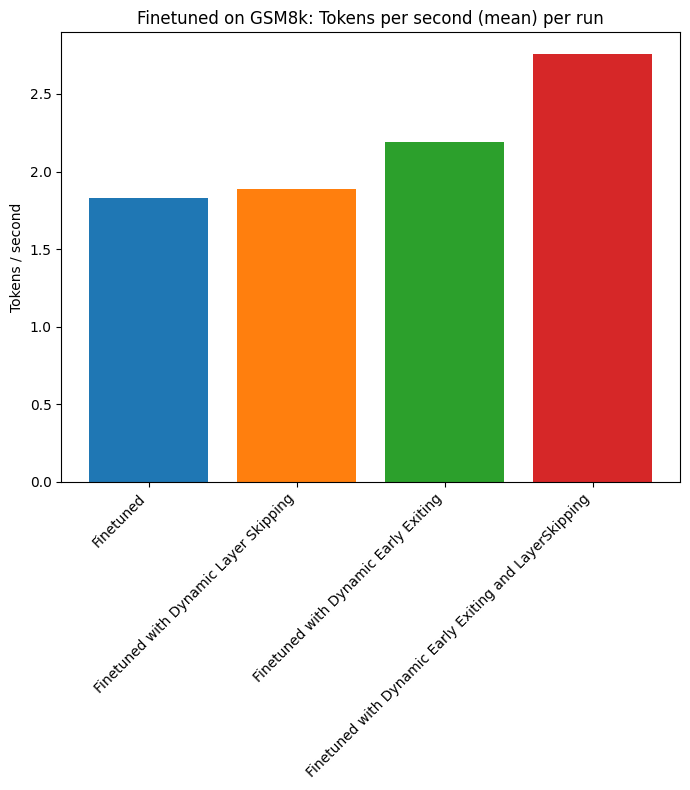

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fill colors you want
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# ------------------------------------------------------------------
# 3️⃣  Plot Acceptance Rate
# ------------------------------------------------------------------
plt.figure(figsize=(7, 8))
bars = plt.bar(labels, acceptance, color=[colors[i % len(colors)] for i in range(len(labels))])
plt.title("Finetuned on GSM8k: Acceptance rate (mean) per run")
plt.ylabel("Acceptance rate")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))  # ticks at 0.0, 0.1, ..., 1.0
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 4️⃣  Plot Tokens per Second
# ------------------------------------------------------------------
plt.figure(figsize=(7, 8))
bars = plt.bar(labels, tps, color=[colors[i % len(colors)] for i in range(len(labels))])
plt.title("Finetuned on GSM8k: Tokens per second (mean) per run")
plt.ylabel("Tokens / second")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
